# TouchTerrain jupyter notebook - starter edition, running on Colab
Chris Harding, Dec. 15, 2022 (<charding@iastate.edu>)

Warning: This is still being tested, especially the Earth Engine Authorization process! Please report bugs to me.

- This particular notebook is meant to only be run on Colab. If you're currently NOT running it inside colab, click on this badge: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ChHarding/TouchTerrain_for_CAGEO/blob/master/TouchTerrain_jupyter_starters_colab.ipynb)


### How to run code inside a notebook

- The grey "window" below (with [] in the upper left corner) is a *code* cell.
- Hovering over the cell will show a circular "play button". CLick on it to run the cell's code.
- Later, you will need to edit the Python code in a cell. For this, click inside the cell (will show a cursor) and make you edits. You can run an edited cell by pressing Shift + Enter.
- You won't see any output for this particular cell but you'll see that the braces in `[ ]` will show a sequential number, which means it's been run. Usually code cells will produce some output, typically text.
- Note: the first few cells start with a ! and actually run OS shell commands (like pip) to install things
- Lines starting with # contain so-called comments (more about these later) which are only meant to give information to you. Please read them and follow any instructions given!
- If you got this notebook from my github repo, you will get a __warning__ when running the first cell - click Run Anyway to continue.
- Note that if you're planning to save any edits you're making to a from-github notebook, you should save this notebook now to your own google drive (*File - Save a copy in Drive*), otherwise edits will be lost once you close this browser tab. To later come back and run your edited copy, go to __https://colab.research.google.com/__, click on __Google Drive__ and then on your notebook.

In [36]:
# The following pip commands all have -q (quiet) at the end which hides (most of) their output. Remove the -q if you want to see the details
!pip install geemap -q

In [37]:
# uninstalling flask b/c it leads to version conflicts later and is not needed
!pip uninstall flask -y -q

In [38]:
!pip install kml2geojson google-api-python-client -q

In [39]:
# installing the touchterrain module from github
!pip install git+https://github.com/ChHarding/TouchTerrain_for_CAGEO.git

  Cloning https://github.com/ChHarding/TouchTerrain_for_CAGEO.git to /tmp/pip-req-build-za79pcne
  Running command git clone --filter=blob:none --quiet https://github.com/ChHarding/TouchTerrain_for_CAGEO.git /tmp/pip-req-build-za79pcne
  Resolved https://github.com/ChHarding/TouchTerrain_for_CAGEO.git to commit 9b83a8254ccf41ec35fbc30419e828fafaed45c4
  Preparing metadata (setup.py) ... done


In [40]:
# Download some example files, these will eventually show up in the Files tab on the left
# More on how to use these later

# Example local geotiff DEM file
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/geotiff_example.tif
!curl -LJO osf.io/download/362k9/ # BedMachine_surface_downsampled10 -Greenland
!curl -LJO https://osf.io/download/688d9674bf542d3a81e3ceaf/ # the other Greenland one

# Example of a gpx path (trail
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/gpx-test/example_path.gpx

# Example of kml polygon file
!curl -LJO https://github.com/ChHarding/TouchTerrain_for_CAGEO/raw/master/stuff/polygon_example.kml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  484k  100  484k    0     0   731k      0 --:--:-- --:--:-- --:--:--  731k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   162  100   162    0     0   2405      0 --:--:-- --:--:-- --:--:--  2417
100   357  100   357    0     0   1196      0 --:--:-- --:--:-- --:--:--  1196
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) Failed writing header
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   357  100   35

In [41]:
# # If you want to connect this notebook to your google drive, run this cell
# # You should see your google drive folder as drive/MyDrive in the File tab on the left
# from google.colab import drive
# drive.mount('/content/drive')

### Preparing to use Google Earth Engine online DEM rasters

- TouchTerrain uses Digital Elevation Model (DEM) data
- You can either use online elevation data or a local elevation dataset (geotiff file)
- if you only want to use terrain data from locally stored raster files (geotiffs), *you don't need to go through this authenticaton part!* Just jump directly to __Ready to go!__ You will get a warning about EE not being initialized properly *(WARNING:root:EE init() error (with .config/earthengine/credentials) Please authorize access to your Earth Engine account)* but you can ignore that.
- TouchTerrain can use DEM data from Google Earth Engine (given the corners of the area), but you need to first set up an earth engine account and create Google cloud project. Note that this includes setting up a charge account, however, you will typically not be charged.
- See this [guide](https://github.com/ChHarding/TouchTerrain_for_CAGEO/blob/master/EarthEngine_authentication_guide.md#request-a-earthengine-dev-account) for how to get an earth engine account.


### Authentication with Earth Engine
- When you run the cell below for the first time, you will be asked to autheticate with EarthEngine

- This text should appear and you should be redirected to a webpage:
```
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does  not start automatically, please manually browse the URL below.
```
- The web page will have you select a Google account for use with Earth Engine and give you a token
- Assuming you got your earth engine account, follow [this part of the guide](https://github.com/ChHarding/TouchTerrain_for_CAGEO/blob/master/EarthEngine_authentication_guide.md#generating-the-token) to get this token
- Paste in your token here: `Enter verification code: <your token>` __and hit Enter(!)__, you should get `Successfully saved authorization token.`
- This needs to be done once after the runtime was created (as it just needs to create a file).

In [42]:
# # Authenticates and initializes Earth Engine
# import ee

# try:
#     ee.Initialize()
# except Exception as e: # if the initialization didn't work, web authenticate first
#     ee.Authenticate()
#     ee.Initialize()

# Ready to go!
- You can now start running TouchTerrain standalone code, starting with importing python packages.
- __Important:__ If you ever change runtimes or if your runtime times out, you have to __repeat installing everything from the top of this notebook again__ as your virtual hard drive got essentially wiped out and you need to install (and authorize) again!
- In this event, do this: Use Edit - Clear all outputs, then go back to the very first cell and run through the installation and authorization again.

### Importing python packages
- Run the next cell, it'll import the required packages into Python, including Touchterrain
- The earth engine package you imported and authorized earlier, will be initialized here.
- If you plan to use online data and did authorize Earth Engine, you should see `EE init() worked with .config/earthengine/credentials`
- If you don't plan on using online data (and therefore didn't authenticate Earth Engine) you will get a warning here, which you can ignore


In [43]:
# import packages
import os.path
from glob import glob
from random import randint
from shutil import rmtree
import ee
from geojson import Polygon
import geemap
from touchterrain.common import TouchTerrainEarthEngine as TouchTerrain
from touchterrain.common.TouchTerrainGPX import *
from os import getcwd, listdir
args = TouchTerrain.initial_args # default args

## Define the values for processing settings
- We now need to define the processing settings for the 3D model we want to create. Unlike the web app, they need to be set via Python variables.
- The variable `args` will hold all processing settings. The __name__ of a setting  will be between [] and inside double quotes, the setting's __value__ will be to the right of the = . The value can be a number (120 or 0.4), a string ("STLb") or the special value `None`.
- Example: `args["tilewidth"] = 120`     will define the value of the setting named `tilewidth` to be 120

### Comments
- In Python, anything to the right of a `#` will be ignored.
- You will often need comment out or uncomment a line of Python code.
- A line starting with a `#` (no spaces before it) is said to be commented out, it will be entirely ignored. This a useful to temporarily deactivate the line and re-activate it again later.
- To uncomment a line means to remove the leading `#`, again leaving no spaces before the first actual code letter. This makes the line valid code again.

<div>

- Example of commenting out a line of code and uncommenting it properly:
```
print(123)
#print(123)
print(123)
```
- Examples of bad commenting with a leading space. I'm using an underscore here for better visibility.
```
_#print(123)
_print(123)
```

### Use a locally stored geotiff DEM file instead of an online DEM
__If you plan to use online Earth Engine data instead of a local geotiff file, skip this cell and go to *Select your print area*__
- You may want create a terrain model from a geotiff DEM file that you've downloaded or created via a GIS. As TouchTerrain needs to import this file during processing, you first need to copy (upload) it via the jupyterLab File Manager.
- Open the File Manager (left side) and drag your geotiff into the panel to upload it. Remember the file name for later
- The installation also downloaded an example geotif file called geotiff_example.tif

<div>

- The cell below sets the value of __importedDEM__ to this path (e.g. `"geotiff_example.tif"`). To use your geotiff file, upload it to the current folder and replace this with it's name, e.g. `"myDEM.tif"` (make sure to use "s around the filename!).
- Hint: if you want to use a tif stored in your (connected) Google Drive, find it in the Files tab, right-click - Copy Path and paste this in below, e.g. `args["importedDEM"] = "/content/drive/MyDrive/DEMs/SanPedro.tif"`
- if you are using a local geotiff, skip _Select DEM source_ and _Select print area on geemap_ as the geotiff is your DEM source and  implicitly defines the print area. Go straight to _Setting the tile width_
- if you do NOT want to use a local geotiff and want to use online DEM rasters instead, leave the value as `None`.

In [44]:
# Comment out one of following two lines:
# args["importedDEM"] =   "geotiff_example.tif" # path of the geotiff file to use
# args["importedDEM"] =   "BedMachine_surface_downsampled.tif" # path of the geotiff file to use
args["importedDEM"] =   "BedMachine_surface_downsampled10km.tif" # path of the geotiff file to use
# args["importedDEM"] = None  # no file used, use online DEM rasters instead

# convert into an absolute path for later
if args["importedDEM"] != None:
    args["importedDEM"]= os.path.abspath(args["importedDEM"])
    print("Current folder", getcwd(), " contains", listdir())
    print("importedDEM", args["importedDEM"])

Current folder /content  contains ['.config', 'polygon_example.kml', 'geotiff_example.tif', 'tmp', 'BedMachine_surface_downsampled10km.tif', 'example_path.gpx', 'BedMachine_surface_downsampled.tif', 'sample_data']
importedDEM /content/BedMachine_surface_downsampled10km.tif


### Select the name of the DEM source (online elevation data)
- Before you can select the actual print area, you need to select which online DEM source will be used. The setting is called `DEM_name`.
- There are several options but for starters you only need to decide among two options:
    - If your area is in the lower 48 US states, use `USGS/NED`
    - Anywhere else on the globe use: `JAXA/ALOS/AW3D30/V2_2`
    - (there are more DEM sources to choose from, see `DEM_name` [here](https://github.com/ChHarding/TouchTerrain_for_CAGEO#processing-parameters) )
- Comment/uncomment the appropriate line in the cell below and hit Shift-Enter

In [45]:
# # Comment out one of the following two lines
# args["DEM_name"] = "USGS/3DEP/10m"  # area is within the lower 48 (US)
# #args["DEM_name"] = "JAXA/ALOS/AW3D30/V2_2"  # area is outside the US (worldwide)

### Import GPX path lines
__This is more of an expert option. If you are just starting, skip this and go to the next cell__
- You can drape one or more gpx (path) files over your terrain
- Similar to importedDEM, the file names for the GPX file(s) are stored in the importedGPX setting.
- However, as you can import more than one GPX file, you need to put the path name into a list, i.e. inside brackets, even if you just have a single GPX file! Separate multiple GPX files with commas:  
    - `args["importedGPX"] = ["justonegpxfile.gpx"]`  
    - `args["importedGPX"] = ["file1.gpx", "file2.gpx", "file3.gpx"]`
- `gpxPathHeight` (in meters) defines how much a path is elevated above the terrain. Use a negative number to create a trench.
- `gpxPixelsBetweenPoints` (in meters) lets you reduce the number of point in your path to place a point only every X meters. This can help to simplify complex patterns.
- `gpxPathThickness` (meters) controls the thickness of the path, which makes it more pronouced when printed
- There are several GPX example files in the stuff folder. To use them, uncomment the first 4 lines in the cell below and comment out the last line.
- If you're not using GPX files, just leave the cell as is and run it. (Or you can skip it). Setting importedGPX to None means that no GPX files are imported.


In [46]:
args["gpxPathHeight"] = 5
args["gpxPixelsBetweenPoints"] = 20
args["gpxPathThickness"] = 2

# Comment out one of the following two lines
#args["importedGPX"] = ["example_path.gpx"] # list of one GPX file, for more, separate them with commas (see above)
args["importedGPX"] = None  # Do not use any GPX path files

## Select your print area
- When using an online DEM, there are several ways to define the area you want to print. Use only one and skip the cells for the other two options. Then go to _Setting the tile width_
- A)  Enter corner coordinates of a box into a code cell
- B)  Use your mouse to digitize a box, circle or polygon on a geemap
- C)  Load a kml file (typically created via Google Earth) that contains a single polygon


### A) Select print area via lat/long coordinates of its corners (optional)
- If you'd rather define your area through actual coordinates, change the default values in the cell below accordingly.
- Note that you *must* give it the lat/long of the bottom left (South-West) corner and lat/long of the top right (North-East) corner!
- After you've run the cell, skip B and C and jump straight to `Setting the tile width`

In [47]:
# Bottom left corner
args["bllat"] = 39.322
args["bllon"] = -120.374

# Top right corner coordinates
args["trlat"] = 39.457
args["trlon"] = -120.2

### B) Select print area interactively via geemap
- If you didn't use a local geotiff or set your the print area's corner coordinates, run the next cell to show an interactive map, from which you will select your print area.
- Valid areas are covered by a grey hillshade layer in the background. If your desired area is not covered, go back and select the worldwide DEM source, and re-run the next cell.
- If you're importing GPX files, they will show up on the map as cyan lines.
- To find the desired print area, use left mouse drag to pan and mouse wheel (or +- buttons) to zoom in/out.
- You can also use the search buttons (globe on top left or spyglass) which will place a marker at the result's location.

In [48]:
# # Create an interactive map and center on default area
# center_lat = (args["trlat"] + args["bllat"]) / 2
# center_lon = (args["trlon"] + args["bllon"]) / 2
# Map = geemap.Map(center=(center_lat, center_lon), zoom=7)

# # make a hillshade layer and add it to map
# dem = ee.Image(args["DEM_name"]) # DEM source
# hs = ee.Terrain.hillshade(dem, 315, 35) # sun azimuth and angle
# vis_params = {'min': 0,'max': 255,} # greyscale color ramp
# Map.addLayer(hs, vis_params, 'hillshade', shown=True, opacity=0.5) # semi transparent overlay

# # if GPX files were used, add them to the map
# if args["importedGPX"] != None and len(args["importedGPX"]) > 0:
#         gpx = ee.Feature(convert_to_GeoJSON(args["importedGPX"]))
#         Map.addLayer(gpx, {"color":'00FFFF', "strokeWidth":"1"}, "GPX line", opacity=0.9)

# Map # makes the interactive map show up as output of this cell



# OR WE COULD PULL IT DIRECTLY FROM THE GEOTIFF WITH RASTERIO - kc

In [49]:
pip install rasterio

In [50]:
    import rasterio

    # Path to your GeoTIFF file
    geotiff_path = args["importedDEM"]

    with rasterio.open(geotiff_path) as src:
        # Get the bounding box in the dataset's CRS
        bounds = src.bounds

        # Extract individual min/max coordinates
        bllon = bounds.left
        bllat = bounds.bottom
        trlon = bounds.right
        trlat = bounds.top

- You could use the place search (click on upper left button, name/address or lat/long) or just fly around.
- Once you found a good general area, hit a Draw button in the center left to digitize the exact outline of your terrain model.
- Your options are: Draw a Polygon or Draw a Rectangle or Draw a Circle. __Do NOT use Draw a Marker or Draw a Polyline!__
- Draw a Rectangle is the simplest method.
- To remove it to draw an different outline, click on the trashcan. If you create multiple outlines, only the last one will be stored (see next cell).
- Edit layer will let you edit a outline.
- Once you're happy with your outline, run the cell below. It will store the (last) outline and use it to create your terrain model. If you change your mind, simply draw another outline and re-run the cell below, it will always take the most recent outline.
- After running the cell below, skip C

In [51]:
# # make and store a GeoJSON polygon from (last) digitized outline
# polyft = Map.draw_last_feature # get last outline
# args["polygon"] = Polygon(polyft.getInfo()['geometry']['coordinates'])
# print("Got it!")

### C) Using a KML file to define the outline of the area
- Instead of digitizing an outline in the geemap, you could instead use a polygon stored in a kml file. You can digitize a polygon in Google Earth and store it as a kml file (NOT a kmz file!).
- In File on the right and drag your kml file into the panel to upload it
- Check that the kml file in the same folder as the notebook (should be in your content folder) and set `poly_file` to its location.

In [52]:
# # If you uploaded a kml file, check that it shows up here:
# print("Current folder", getcwd(), " contains: ", listdir())

# # Comment out either this line:
# args["poly_file"] = None # Don't use a kml file

# # or both of these lines:
# #args["poly_file"] = "polygon_example.kml" # location of kml file to use
# #args["polygon"] = None  # ensures that any gee polygon you might have digitized is not used

### Setting the tile width
- (If you used a local geotiff file as DEM, resume here)
- The tilewidth setting defines how (physically) large the selected print area will be after it's been printed. Units are in mm.
- By width, we mean the extent of your model in the East-West direction. The height will be automatically calculated based on the area you selected earlier.
- Change the value in the cell below to your liking and hit Shift-Enter

In [53]:
args["tilewidth"] = 150 # in mm

### Setting the number of tiles and their and setup  
- It's possible to divide the print are into multiple tiles. This will results in several STL files instead of just one.
- This is useful if you want to print several (smaller) tiles that each fit on you buildplate and later glue them together into one large model.
- If you just want a single STL file, set both, ntilesx and ntilesy, to 1
- For multiple tiles, decide how many tiles you want along East-West (ntilesx) and how many along North-South (ntilesy)

In [54]:
args["ntilesx"] = 1 # number of tiles in x
args["ntilesy"] = 1 # number of tiles in y

### Setting the Base thickness (in mm)
- The basethick setting determines how much material is put beneath the thinnest part to the terrain print
- Use a value of at least 0.5 mm, more if you want a beefier base

In [55]:
args["basethick"] = 0.6 # in mm

### Setting the print resolution
- Set this value to the diameter of you nozzle size or slightly below.
- Tinker with this only if you know what you're doing. This setting defines how much of the fine details the STL file will contain. The detail you're realistically able to print is limited by your nozzle size. If you set setting much lower than your nozzle size, the STL file will be needlessly large, the slicer will take longer but your print will come out the same as if you had used approximately your nozzle size.
- In almost all cases, 0.4 mm will be fine for 3D printers.
- If you are using a local geofiff file, setting this to -1 will use the native resolution of the geotiff. This is typically overkill b/c of the nozzle limitation and may lead to huge models that may be too much for you system to handle!

In [56]:
args["printres"] = 0.4 # in mm

### Setting the z-scale (elevation exaggeration factor)
- To print the terrain in its "true" form (without any vertical scaling applied), set zscale to 1.0. This works well for terrain with great elevation differences, such as the Grand Canyon or Mt. Fuji
- Most other terrain usual benefits from a z-scale larger than 1. For gentle hills, use 1.5 to 2.5. For cities use 2.5 to 6. For river deltas and other low relief areas use up to 10.
- The height of your printed terrain should be at least 20 - 30 mm high to show good detail. You can check the processing log for `top min/max`, max should be least 20 - 30 mm. If this is too low, use a higher zscale and process again.
- Alternatively, you can set this to a __negative number__ which will be interpreted as the desired height of the tallest terrain point in mm. Examples:  -12.7 means "make 1/2 inch tall", -20 means "make 20 mm tall", etc.

In [57]:
args["zscale"] = -20 # elevation scale factor

### Set the name of your terrain model zipfile
- Once a STL file of your terrain model has been created, it will be zipped into a zipfile and copied into the tmp folder. The zipfile also contains a log file and a geotiff.
- It's often a good idea to give the zipfile a name that reflects the terrain, e.g. grand_canyon.zipfile
- Set zip_file_name to the name of your zipfile. Dot not add the .zip extension, this will be done automatically
- With Jupyterlab, right click on the zip file and choose Download from the pulldown

In [58]:
args["zip_file_name"] = "myterrain" # terrain model will be inside tmp/myterrain.zip

### Other settings
- There are several more expert settings which you can skip unless you have specific requirements for more complex operations.
- If you're interested, look here: https://github.com/ChHarding/TouchTerrain_for_CAGEO#processing-parameters, then put your code in the cell below and run it.
- Here are some examples of possible expert setting.
- The syntaxt is always: `args["name_of_setting"] = value_of_setting`
  - make sure that name_of setting is always between double quotes (it's a string)
  - value_of_setting can be a whole number, a decimal number or some text (text must again be surrounded by double quotes!)


In [59]:
# Examples of expert settings:

# remove all raster cells that are equal or lower than 0
#args["ignore_leq"] = 0

# lower raster cells that are equal or lower than 0 by 3 m
#args["lower_leq"] = [0, 3]  #[0, 3] is a list with 2 values

# set projection to ESPG code 3857 (Web mercator)
#args["projection"] = 3857

# Switch off border smoothing for models with polygon borders (True by default)
#args["smooth_borders"] = False

# define a polygon border via lat/long coordinates
args["poly"] = {"type": "Polygon", "coordinates": [[[30, 10], [40, 40], [20, 40], [10, 20], [30, 10]]]}  # {} means value is a dictionary

# save output as geotiff only
#args["file_format"] = "GeoTiff"
#-------------------------------------------------------------------------------------------

# your code here:


## Print the values for all settings
- this can be useful for checking if you forgot to set something

In [60]:
for name in args:
    print(name, args[name])

DEM_name USGS/3DEP/10m
bllat 39.322
bllon -120.374
trlat 39.457
trlon -120.2
importedDEM /content/BedMachine_surface_downsampled10km.tif
printres 0.4
ntilesx 1
ntilesy 1
tilewidth 150
basethick 0.6
zscale -20
fileformat STLb
tile_centered False
zip_file_name myterrain
CPU_cores_to_use None
max_cells_for_memory_only 9000000
no_bottom False
bottom_image None
ignore_leq None
lower_leq None
unprojected False
only None
importedGPX None
smooth_borders True
offset_masks_lower None
fill_holes None
poly_file None
min_elev None
tilewidth_scale None
clean_diags False
bottom_elevation None
dirty_triangles: False
gpxPathHeight 5
gpxPixelsBetweenPoints 20
gpxPathThickness 2
poly {'type': 'Polygon', 'coordinates': [[[30, 10], [40, 40], [20, 40], [10, 20], [30, 10]]]}


## Generating the STL model file
- Running the next cell will convert the DEM (either from a local geotiff file or from a Google Earth online DEM source) into STL file and put it inside a zipfile in the tmp folder. You will also get a log file and the geotiff that was processed.
- This may take some time and the tmp folder may not show up immediately after the cell finishes.
- During processing you'll see messages. Those messages will also be in the logfile inside the zip, and may be useful later.

INFO:root:Log for creating 1 x 1 3D model tile(s) from BedMachine_surface_downsampled10km.tif  
 
INFO:root:started: 11:22:13.645375 
INFO:root:source raster upper left corner (x/y):  -653000.0 -632600.0 
INFO:root:source raster cells size 999.8043052837573 m  (2752, 1533) 
INFO:root:undefined DEM value: 9.969209968386869e+36 
INFO:root:DEM (top) raster file: /content/BedMachine_surface_downsampled10km.tif 
INFO:root:DEM projection & datum: Polar_Stereographic WGS_1984 
INFO:root:z-scale: -20 
INFO:root:min_elev: None 
INFO:root:basethickness: 0.6 
INFO:root:fileformat: STLb 
INFO:root:tile_centered: False 
INFO:root:no_bottom: False 
INFO:root:no_normals: True 
INFO:root:ignore_leq: None 
INFO:root:lower_leq: None 
INFO:root:importedGPX: None 
INFO:root:tile_width: 150 
INFO:root:tile_height: 269.2759295499021 
INFO:root:source raster width 1532700.0 m, cell size: 999.8043052837573 m, elev. min/max is 0.0 3595.43603515625 m 
INFO:root:source raster 3D print resolution would be 0.09784

Log for creating 1 x 1 3D model tile(s) from BedMachine_surface_downsampled10km.tif  
 
started: 11:22:13.645375 
source raster upper left corner (x/y):  -653000.0 -632600.0 
source raster cells size 999.8043052837573 m  (2752, 1533) 
undefined DEM value: 9.969209968386869e+36 
DEM (top) raster file: /content/BedMachine_surface_downsampled10km.tif 
DEM projection & datum: Polar_Stereographic WGS_1984 
z-scale: -20 
min_elev: None 
basethickness: 0.6 
fileformat: STLb 
tile_centered: False 
no_bottom: False 
no_normals: True 
ignore_leq: None 
lower_leq: None 
importedGPX: None 
tile_width: 150 
tile_height: 269.2759295499021 
source raster width 1532700.0 m, cell size: 999.8043052837573 m, elev. min/max is 0.0 3595.43603515625 m 
source raster 3D print resolution would be 0.09784735812133072 mm 
re-sampling BedMachine_surface_downsampled10km.tif :
  (1533, 2752) 0.09784735812133072 mm  999.8043052837573 m  0.0 - 3595.43603515625 m 
  (375, 673) 0.4 mm  4087.2000000000003 m  0.0 - 3233.

INFO:root:map scale is 1 : 10218000.0 
INFO:root:From requested model height of 20 mm, calculated a z-scale of 63.205166 



From requested model height of 20 mm, calculated a z-scale of 63.205166 
elev min/max : 0.00 to 3233.28


DEM plot and histogram saved as tmp/BedMachine_surface_downsampled10km.tif_elevation_plot_with_histogram.png
INFO:root:Cells per tile (x/y) 375 x 673 
INFO:root:using single-core only (multi-core is currently broken :( 
Writing tile into memory buffer
creating internal triangle data structure for <_MainProcess name='MainProcess' parent=None started>


Cells per tile (x/y) 375 x 673 
using single-core only (multi-core is currently broken :( 
top min/max for tile (mm): 0.6 20.600000001214745


10 % <_MainProcess name='MainProcess' parent=None started>
20 % <_MainProcess name='MainProcess' parent=None started>
30 % <_MainProcess name='MainProcess' parent=None started>
40 % <_MainProcess name='MainProcess' parent=None started>
50 % <_MainProcess name='MainProcess' parent=None started>
60 % <_MainProcess name='MainProcess' parent=None started>
70 % <_MainProcess name='MainProcess' parent=None started>
80 % <_MainProcess name='MainProcess' parent=None started>
90 % <_MainProcess name='MainProcess' parent=None started>
100% <_MainProcess name='MainProcess' parent=None started> 

tile 1 1 STLb 24.268421173095703 Mb 
INFO:root:
1 x 1 tiles, tile size 150.00 x 269.20 mm
 
INFO:root:tile 1 1 : height:  0.6 - 20.600000001214745 mm , file size: 24 Mb 
INFO:root:
total size for all tiles: 24.3 Mb 
INFO:root:
processing finished: 11:22:26.354550 



1 x 1 tiles, tile size 150.00 x 269.20 mm
 
tile 1 1 : height:  0.6 - 20.600000001214745 mm , file size: 24 Mb 

total size for all tiles: 24.3 Mb 
zip finished: 11:22:26.354500

processing finished: 11:22:26.354550 
Created zip file tmp/myterrain.zip 24.27 Mb


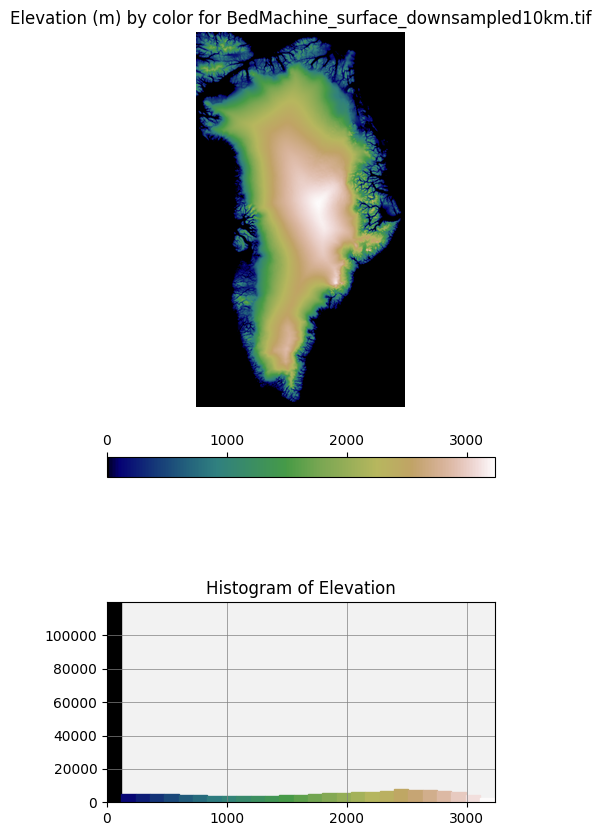

In [61]:
# create zipfile under tmp with the STL file of the terrain model
totalsize, full_zip_file_name = TouchTerrain.get_zipped_tiles(**args)
print("Created zip file", full_zip_file_name,  "%.2f" % totalsize, "Mb")

## Unzip the zip file
- This will unzip the zip file created earlier in a folder with the same name
- This makes it easier quickly look into the logfile in colab (just double-click on it) or to directly download the STL (Right-click - Download)
- The original zip file is still there, in case you want to download it


In [62]:
folder, file = os.path.splitext(full_zip_file_name) # get folder of zip file

# unzip the zipfile into the folder it's already in
import zipfile
zip_ref = zipfile.ZipFile(full_zip_file_name, 'r')
zip_ref.extractall(folder)
zip_ref.close()
print ("unzipped files from", full_zip_file_name, "into the folder", folder)
print (folder, "contains these files:")
for f in glob(folder + os.sep + "*.*"): print(" ", f)

unzipped files from tmp/myterrain.zip into the folder tmp/myterrain
tmp/myterrain contains these files:
  tmp/myterrain/BedMachine_surface_downsampled_tile_1_1.STL
  tmp/myterrain/logfile.txt
  tmp/myterrain/BedMachine_surface_downsampled10km_tile_1_1.STL


## Final thoughts
- Sadly k3d doesn't seem to work in Colab, so you cannot preview your model here :(
- To download your file(s): Click on the *Files* icon on the very left to your notebook and then double-click on _tmp_
- Right-click on the the zip-file or a file in the folder you unzipped to and go to Download
- To preview your stl file, you could use use this <a href="https://stlviewer.kwebpia.net/" target="_blank">Online viewer</a>. Just drop your downloaded stl file into it.
- (Disclaimer: I'm not affiliated with them and there may be other/better viewers out there. On Windows an app called __3D Builder__ seems to work well.)
